## Helper Functions

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import numpy as np
from IPython.display import Image
from graphviz import Digraph


class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 


class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

/var/folders/z_/xphnyhxs03sg7p8v5dgkr10w0000gn/T/ipykernel_9806/2089241031.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


ModuleNotFoundError: No module named 'graphviz'

## Inserting Graph Data

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns
Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 



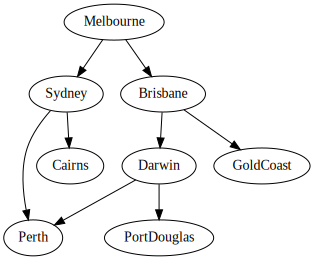

In [3]:
# Connect adjacent numbers from 0 to 9
# G = Graph()
# for i in range(10):
#     G.addVertex( Node(i) )

# V = G.vertices
# for i in range(9):
#     G.addDiEdge( V[i], V[i+1] )

# print(G)


# City connections
G = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G.addVertex( Node(i) )
V = G.vertices
for i in range(len(V)):
    print(i, V[i].value)

#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )

#dot.edge('Darwin', 'Perth')
G.addDiEdge( V[4], V[3] )

#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )
print(G)

# visualize the graph
dot = Digraph()
dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')
dot

In [11]:
node = G.vertices[0]
str(node)
print(node.inNeighbors)
print([str(node) for node in node.outNeighbors])

[]
['Sydney', 'Brisbane']


***

### BFS & DFS

<img src="../pics/dfs.png">

In [17]:
# def DFS(root):
    
#     if root == Null:
#         return

#     root.visited = True

#     for n in root.neighbours:
#         if n.visited == False:
#             DFS(n)



# I uncomment this due to some bugs here
# def BFS(root):

#     visited = [False] * (num_nodes_in_graph)

#     # Create a queue for BFS
#     queue = []

#     queue.append(root)
#     visited[root] = True

#     while queue:

#         r = queue.pop(0)
#         print(r)
#         print(type(r))

#         for n in r.adjacent:
            
#             if visited[n] == False:
                
#                 visited[n] = True
#                 queue.append(n)
def BFS(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        # add nodes connected from i-th node
        for u in Ls[i]:
            
            print(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)


# Compared to the list implementation, I prefer the queue implementation https://medium.com/@sergioli/breath-first-and-depth-first-search-on-tree-and-graph-in-python-99fd1861893e
# One advantage of the list implementation is the explicit level of traversal.
# Logically, I prefer to follow the definition of "visited" after doing something on adjacent nodes. This code does the thing inversely


def DFS_helper(w):
    
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            
            DFS_helper(v)
    
    print(w)
    w.status = "done"
    
        
def DFS(w, G):
    
    for v in G.vertices:
        
        v.status = "unvisited"
        
    return DFS_helper(w)


# This is an implementation of post-order depth-first search, i.e., outputting the root node after backtracking from the leaf node.
# whilere-order depth-first search outputs the root node before reaching the leaf node 

# Let us do the DFS from Melbourne
# w = G.vertices[0]
# DFS(w, G)

# Let us do the BFS from Melbourne
# w = G.vertices[0]
# BFS(w, G)

## Bidirectional Search

In [ ]:
# "The goal test: whether the frontiers of the two searches intersect"
# Keep track of the parent of each node?
# Directed graph?

## Bi-partite

<img src="../pics/bi-partite.png"/>

***

In [ ]:
# Next level of nodes belong to another set








***

### Strongly Connected Components

<img src="../pics/scc.png" width="500">

Kosaraju's Algorithm
* Step1: We do repeated DFS (as described above) to create a DFS forest. But while doing this:
    + We keep track of finishing times of each node.
* Step 2: Once this is done, we reverse all the edges in the graph.
* Step 3: then we do another application of repeated DFS to create another DFS forest.
    + This time, we order the nodes in the reverse order of their finishing times that they had from the first run of DFS (This mean that when we have to choose a node to do a DFS, we choose in order of finishing time).

The SCCs are the different trees in the second DFS forest.

In [ ]:
def DFS_helper(w, stack):
    pass

def DFS_helper_reverse(w, visited):
    print(w)  # printing the node as part of SCC
    pass
    
def SCC(G):
    # Step 1: DFS for each vertex to generate stack
    pass
    
    # Step 2: Reverse the graph
    GR = reverseGraph(G)  # Assuming reverseGraph function is implemented
    
    # Step 3: DFS for the node from the stack
    pass

# Assuming a function to reverse the graph is defined as follows:
def reverseGraph(G):
    GR = Graph(len(G.vertices))
    for v in G.vertices:
        for w in v.getOutNeighbors():
            GR.addEdge(w, v)
    return GR

Let us start by adding inTime and outTime in the Node first

In [ ]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.inTime = None
        self.outTime = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

We should modify our Graph data structure to be able to reverse edges in the graph, we will do this by adding an extra function reverseEdge(u, v)

In [ ]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Okay, let us now modify our DFS to include in and out time during graph traversal

In [ ]:
def DFS(w, currentTime, ordering, verbose):
    
    if verbose:
        print("Time", currentTime, ":\t entering", w)
    
    w.inTime = currentTime
    currentTime += 1
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            currentTime = DFS(v, currentTime, ordering, verbose)
            currentTime += 1
    
    w.outTime = currentTime
    w.status = "done"
    ordering.insert(0, w)
    
    if verbose:
        print("Time", currentTime, ":\t leaving", w)
    
    return currentTime

An now the SCC algorithm:

In [ ]:
def SCC(G, verbose=False):
    
    #### Placeholder for this modules tasks ####
    ### Good Luck ###
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

Test you code against the use case we did in the lecture

In [ ]:
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

G = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    G.addVertex(v)
    
E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
for x,y in E:
    G.addDiEdge( x,y )

print(G)

In [ ]:
SCCs = SCC(G, False)
for X in SCCs:
    print ([str(x) for x in X])

***